In [1]:
#Bmore_COVID_EDA_Part2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

zipData = pd.read_csv('ZipData_CLEANED.csv')
zipData.fillna(0)

,Unnamed: 0,Zip Code,AREALAND,AREAWATR,Pop2010_x,HU100,NHW,NHB,NHAI,NHA,...,PCTPOP65,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,TotalCases,Pop2010_y
0,0,20010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,20161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,21918,45741330.0,6628177.0,4284.0,1589.0,4096.0,55.0,6.0,30.0,...,11.2,41.2,69.0,4.3,61.1,30.0,12.8,24.2,208.0,0.0
532,532,21919,112736603.0,22553121.0,3467.0,2179.0,3321.0,43.0,14.0,8.0,...,19.5,47.1,84.0,3.9,52.7,39.5,12.9,21.7,143.0,0.0
533,533,21920,1290392.0,0.0,257.0,100.0,228.0,17.0,0.0,0.0,...,10.5,42.6,8.0,8.0,40.2,41.3,31.5,26.6,0.0,0.0
534,534,21921,244939298.0,14098236.0,44471.0,17232.0,36707.0,3953.0,98.0,673.0,...,10.8,36.7,892.0,5.2,51.9,24.5,31.3,34.5,2875.0,0.0


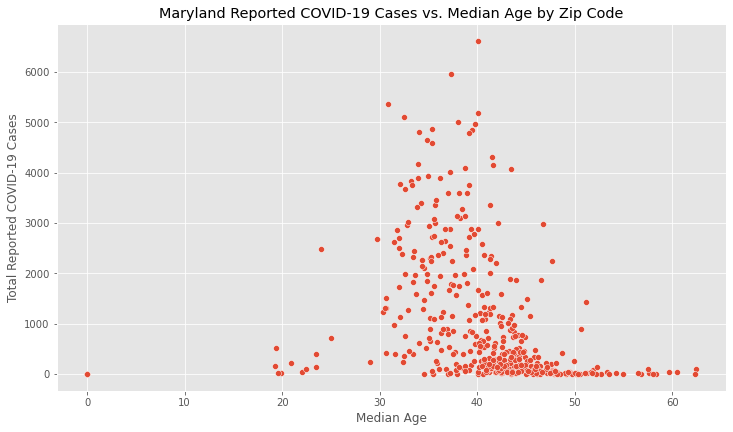

[[nan nan]
 [nan nan]]


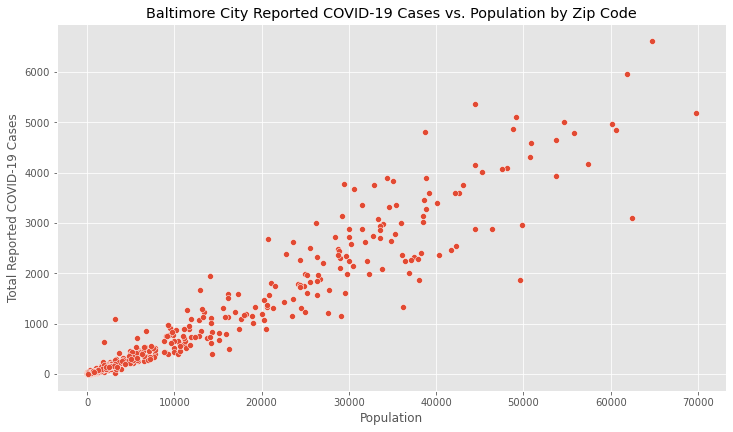

[[nan nan]
 [nan nan]]


In [2]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='MEDAGE',y='TotalCases',data=zipData,legend=False)
_ = plt.xlabel('Median Age')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Maryland Reported COVID-19 Cases vs. Median Age by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['MEDAGE','TotalCases']],rowvar=False)
print(corr)

#remove outliers
y = zipData['Pop2010_x']
removed_outliers_pop = y.between(y.quantile(.05), y.quantile(.95))
zipData = zipData[zipData['Pop2010_x'] != removed_outliers_pop]

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010_x',y='TotalCases',data=zipData,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['Pop2010_x','TotalCases']],rowvar=False)
print(corr)

In [3]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0,len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [4]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(zipData['Pop2010_x'].to_numpy(),zipData['TotalCases'].to_numpy(),200)

#95% C.I. for regression line slopes
cis95 = np.percentile(bs_slope_reps,[2.5,97.5])
print(cis95)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
#linear regression with 200 bootstrap lines 
a,b = np.polyfit(zipData['Pop2010_x'],zipData['TotalCases'],1)
x = np.array([0,80000])
y = a * x + b

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
for i in range(200):
    _ = plt.plot(x,bs_slope_reps[i]*x + bs_intercept_reps[i],
                linewidth=0.5,alpha=0.2,color='purple')
_ = sns.scatterplot(x='Pop2010_x',y='TotalCases',data=zipData,legend=False,color='red')
_ = plt.plot(x,y,linewidth=1, color='blue')
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.margins(.02)
plt.show()

corr = np.corrcoef(zipData[['Pop2010_x','TotalCases']],rowvar=False)
print(corr)

In [ ]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010_x',y='TotalCases',data=zipData,size='MEDAGE',legend='brief')
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Maryland Population vs. Reported COVID-19 Cases by Zip Code')
plt.show()

corr = np.corrcoef(zipData[['Pop2010_x','TotalCases']],rowvar=False)
print(corr)